In [70]:
import sys
sys.path.append('..')
import pandas as pd
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('../../data/processed_reviews.csv')
df = df[['subcategory','review_text', 'star_rating']]

In [44]:
import BERTopic_kmeans

In [45]:
importlib.reload(BERTopic_kmeans)
from BERTopic_kmeans import BERTopic_kmeans

In [46]:
method = BERTopic_kmeans(df)

# run on one subcategory

In [47]:
# %%time
# subcat = 'SPRAY CLEANERS BLEACH CLEANERS'
# res_df = method.train_model_subcategory(subcat, verbose=2, calc_similarity=False)

In [48]:
# subcat_filter = res_df['subcategory'] == subcat
# res_df[subcat_filter & (res_df['star_rating']==1)].sample(5)

In [49]:
# res_df = method.calculate_similarity_score(subcat)

In [50]:
# res_df = method.df
# res_df[subcat_filter & (res_df['star_rating']==1)].sample(5)

# run on multiple subcategories

In [51]:
subcats = df['subcategory'].value_counts().where(lambda x: (x<15000) & (x > 1000)).dropna().index

In [52]:
len(subcats)

44

1 min 8 sec in total for ['FLOOR CLEANERS', 'TOILET BOWL CLEANERS', 'SPRAY CLEANERS BLEACH CLEANERS']

# using top 15 words

In [ ]:
res_df = pd.DataFrame()
# select subcategories starting with DILUTABLES SCENTED/NON-DISINFECTING DILUTABLES
start_index = 0
subcats = subcats[start_index:]
for subcat in subcats:
    print(subcat)
    res = method.train_model_subcategory(subcat, verbose=2)
    # save results
    subcat_name = subcat.replace('/', '_')
    res[res['subcategory']==subcat].to_csv(f'../../data/bertopic_kmeans_{subcat_name}_top15words.csv', index=False)
    res_df = pd.concat([res_df, res[res['subcategory']==subcat]])

BODY CARE

Creating BERTopic kmeans models for BODY CARE
Creating BERTopic kmeans model for 1.0 star rating with 911 reviews, 3 topics
Topic 0: "Failed lotion with poor formula for dry skin"
	['skin', 'use', 'smell', 'product', 'like', 'lotion', 'dry', 'formula', 'new', 'feel', 'buy', 'good', 'try', 'make', 'leave']
Topic 1: "Damaged or faulty products received"
	['order', 'receive', 'product', 'item', 'pack', 'buy', 'use', 'bottle', 'time', 'pump', 'open', 'package', 'bar', 'good', 'return']
Topic 2: "Disappointing scent and feel of new soap formula"
	['soap', 'use', 'scent', 'bar', 'change', 'smell', 'new', 'original', 'caress', 'like', 'year', 'skin', 'buy', 'formula', 'feel']
Finished creating BERTopic kmeans model for 1.0 in 7.52 seconds

--------------------------------------------------
Creating BERTopic kmeans model for 2.0 star rating with 332 reviews, 3 topics
Topic 0: "Dry skin despite using soap and product"
	['skin', 'use', 'dry', 'soap', 'like', 'product', 'feel', 'origin

In [54]:
topic_infos = []
for subcat in subcats:
    topic_info = method.get_topic_information(subcat)
    topic_info.loc[:, 'subcategory'] = subcat
    topic_infos.append(topic_info)

# concat dataframes in topic_infos

topic_infos_df = pd.concat(topic_infos)
topic_infos_df

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
0,1.0,"""Damaged or faulty products received""",0.178628,293,BODY CARE
1,1.0,"""Disappointing scent and feel of new soap form...",0.558176,258,BODY CARE
2,1.0,"""Failed lotion with poor formula for dry skin""",0.387064,360,BODY CARE
3,2.0,"""Dry skin despite using soap and product""",0.420443,124,BODY CARE
4,2.0,Flawed product packaging and opening issues wi...,0.235068,111,BODY CARE
...,...,...,...,...,...
4,3.0,Good floor mop with some quirks,0.272676,45,FLOOR CLEANERS
5,3.0,Here is a concise and coherent phrase that sum...,0.454452,18,FLOOR CLEANERS
6,4.0,"""Effective cleaning and great performance on f...",0.407718,52,FLOOR CLEANERS
7,4.0,"""Product works well and smells great for good ...",0.297445,43,FLOOR CLEANERS


In [55]:
topic_infos_rating_avgd = topic_infos_df.groupby(['subcategory', 'star_rating']).agg({'bertopic_kmeans_similarity_score': 'mean', 'count': 'sum'}).reset_index()
topic_infos_rating_avgd

,subcategory,star_rating,bertopic_kmeans_similarity_score,count
0,ABRASIVE CLEANERS,1.0,0.244523,244
1,ABRASIVE CLEANERS,2.0,0.288028,78
2,ABRASIVE CLEANERS,3.0,0.303126,123
3,ABRASIVE CLEANERS,4.0,0.311645,298
4,ABRASIVE CLEANERS,5.0,0.328670,3684
...,...,...,...,...
215,WOOD/FURNITURE/DUST WOOD/FURNITURE CLEANER,1.0,0.248994,77
216,WOOD/FURNITURE/DUST WOOD/FURNITURE CLEANER,2.0,0.313815,30
217,WOOD/FURNITURE/DUST WOOD/FURNITURE CLEANER,3.0,0.377992,62
218,WOOD/FURNITURE/DUST WOOD/FURNITURE CLEANER,4.0,0.419244,137


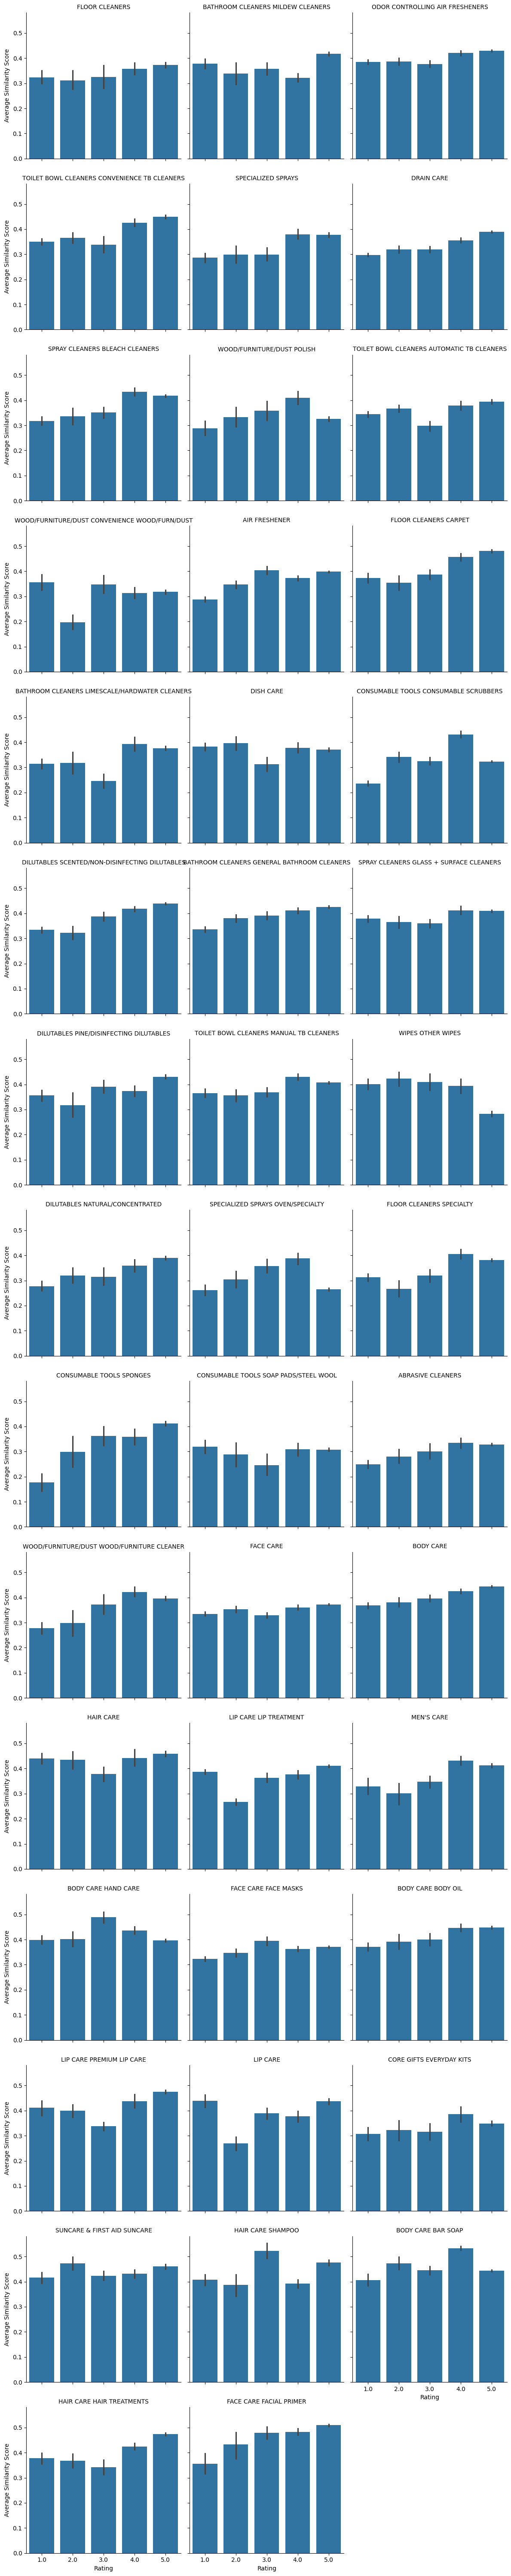

In [56]:
subcats_filter = df['subcategory'].isin(subcats)
df_avg_similarity = df[subcats_filter].groupby(['star_rating', 'subcategory']).agg({'bertopic_kmeans_similarity_score': 'mean'}).reset_index()

# Create a FacetGrid with each subcategory in a separate plot
g = sns.FacetGrid(df[subcats_filter], col='subcategory', col_wrap=3, height=4)
g.map(sns.barplot, 'star_rating', 'bertopic_kmeans_similarity_score', order=sorted(df['star_rating'].unique()))
g.set_axis_labels('Rating', 'Average Similarity Score')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

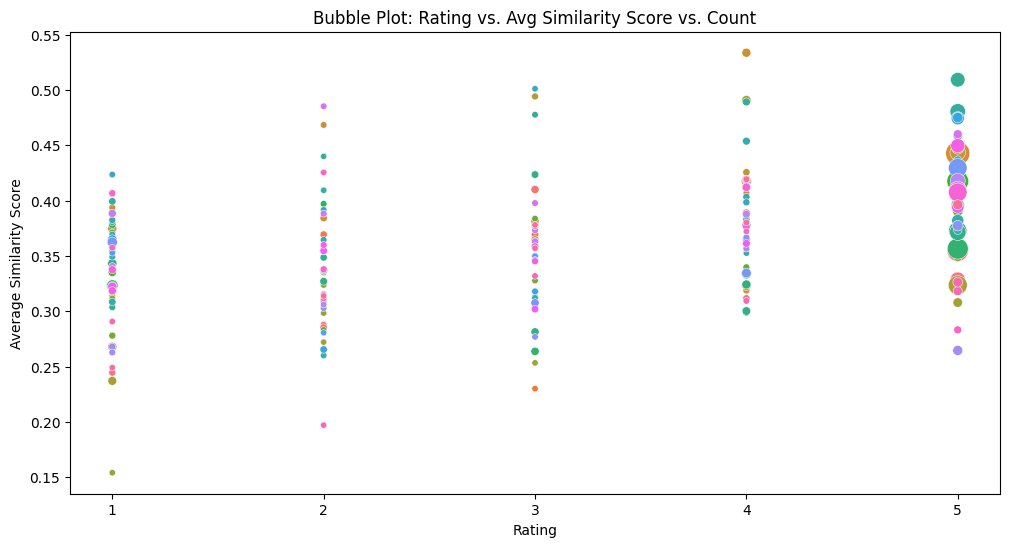

In [86]:
import numpy as np
plt.figure(figsize=(12, 6))
sns.scatterplot(data=topic_infos_rating_avgd, x='star_rating', y='bertopic_kmeans_similarity_score', 
                size='count', sizes=(20, 300), hue='subcategory')
plt.title('Bubble Plot: Rating vs. Avg Similarity Score vs. Count')
plt.xlabel('Rating')
plt.xticks(np.arange(1, 6, 1))
plt.ylabel('Average Similarity Score')
# hide legend
plt.legend().remove()
plt.show()


In [58]:
topic_infos_df.groupby(['subcategory']).agg({'bertopic_kmeans_similarity_score': 'mean', 'count': 'sum'}).reset_index()

,subcategory,bertopic_kmeans_similarity_score,count
0,ABRASIVE CLEANERS,0.291479,4427
1,AIR FRESHENER,0.326544,11161
2,BATHROOM CLEANERS GENERAL BATHROOM CLEANERS,0.363689,6271
3,BATHROOM CLEANERS LIMESCALE/HARDWATER CLEANERS,0.321760,1472
4,BATHROOM CLEANERS MILDEW CLEANERS,0.362404,2633
5,BODY CARE,0.395412,14068
6,BODY CARE BAR SOAP,0.447596,5595
7,BODY CARE BODY OIL,0.393384,3116
8,BODY CARE HAND CARE,0.400558,3877
9,CONSUMABLE TOOLS CONSUMABLE SCRUBBERS,0.341995,8992


# using top 10 words

In [ ]:
res2_df = pd.DataFrame()
for subcat in subcats:
    print(subcat)
    res = method.train_model_subcategory(subcat, verbose=2)
    # save results
    subcat_name = subcat.replace('/', '_')
    res[res['subcategory']==subcat].to_csv(f'../../data/bertopic_kmeans_{subcat_name}_top10words.csv', index=False)
    res2_df = pd.concat([res2_df, res[res['subcategory']==subcat]])
topic_infos2 = []
for subcat in subcats:
    topic_info = method.get_topic_information(subcat)
    topic_info.loc[:, 'subcategory'] = subcat
    topic_infos2.append(topic_info)

# concat dataframes in topic_infos

topic_infos2_df = pd.concat(topic_infos2)
topic_infos2_df

BODY CARE

Creating BERTopic kmeans models for BODY CARE
Creating BERTopic kmeans model for 1.0 star rating with 911 reviews, 3 topics
Topic 0: "Product formula disappointing, leaves skin dry"
	['skin', 'use', 'smell', 'product', 'like', 'lotion', 'dry', 'formula', 'new', 'feel', 'buy', 'good', 'try', 'make', 'leave']
Topic 1: Defective or damaged product received.
	['order', 'receive', 'product', 'item', 'pack', 'buy', 'use', 'bottle', 'time', 'pump', 'open', 'package', 'bar', 'good', 'return']
Topic 2: "Formula changes to new soap bar smells unpleasantly like caress"
	['soap', 'use', 'scent', 'bar', 'change', 'smell', 'new', 'original', 'caress', 'like', 'year', 'skin', 'buy', 'formula', 'feel']
Finished creating BERTopic kmeans model for 1.0 in 6.23 seconds

--------------------------------------------------
Creating BERTopic kmeans model for 2.0 star rating with 332 reviews, 3 topics
Topic 0: "Feels dry after using, doesn't match expectations"
	['skin', 'use', 'dry', 'soap', 'produ

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
0,1.0,"""Formula changes to new soap bar smells unplea...",0.543877,258,BODY CARE
1,1.0,"""Product formula disappointing, leaves skin dry""",0.393542,360,BODY CARE
2,1.0,Defective or damaged product received.,0.200106,293,BODY CARE
3,2.0,"""Dissatisfying soap that doesn't smell like or...",0.460324,110,BODY CARE
4,2.0,"""Feels dry after using, doesn't match expectat...",0.272320,134,BODY CARE
...,...,...,...,...,...
4,3.0,"""Pain points in grout stain removal despite pr...",0.212276,31,FLOOR CLEANERS
5,3.0,Effective cleaner for carpet and hard floor.,0.411656,32,FLOOR CLEANERS
6,4.0,"""Effective carpet cleaner, good for use, nice ...",0.381064,66,FLOOR CLEANERS
7,4.0,"""Mop and bucket efficiently clean floors with ...",0.437287,29,FLOOR CLEANERS


In [60]:
topic_infos2_rating_avgd = topic_infos2_df.groupby(['subcategory', 'star_rating']).agg({'bertopic_kmeans_similarity_score': 'mean', 'count': 'sum'}).reset_index()
topic_infos2_rating_avgd

,subcategory,star_rating,bertopic_kmeans_similarity_score,count
0,ABRASIVE CLEANERS,1.0,0.246734,244
1,ABRASIVE CLEANERS,2.0,0.323720,78
2,ABRASIVE CLEANERS,3.0,0.256354,123
3,ABRASIVE CLEANERS,4.0,0.333549,298
4,ABRASIVE CLEANERS,5.0,0.333508,3684
...,...,...,...,...
215,WOOD/FURNITURE/DUST WOOD/FURNITURE CLEANER,1.0,0.344296,77
216,WOOD/FURNITURE/DUST WOOD/FURNITURE CLEANER,2.0,0.307019,30
217,WOOD/FURNITURE/DUST WOOD/FURNITURE CLEANER,3.0,0.412615,62
218,WOOD/FURNITURE/DUST WOOD/FURNITURE CLEANER,4.0,0.484432,137


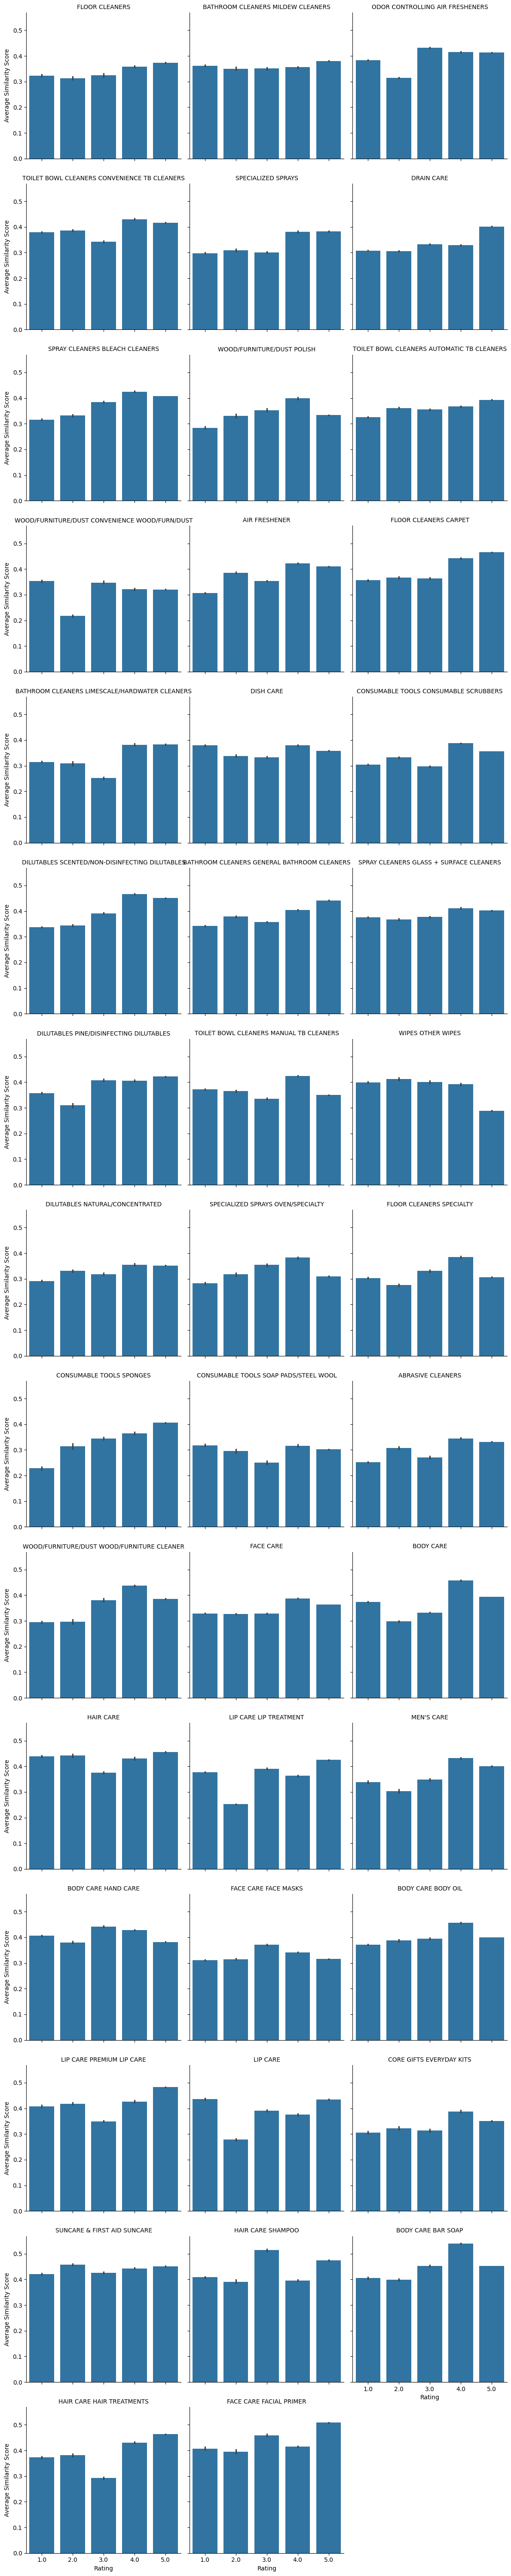

In [61]:
subcats_filter = res2_df['subcategory'].isin(subcats)

# Create a FacetGrid with each subcategory in a separate plot
g = sns.FacetGrid(res2_df[subcats_filter], col='subcategory', col_wrap=3, height=4)
g.map(sns.barplot, 'star_rating', 'bertopic_kmeans_similarity_score', order=sorted(df['star_rating'].unique()))
g.set_axis_labels('Rating', 'Average Similarity Score')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

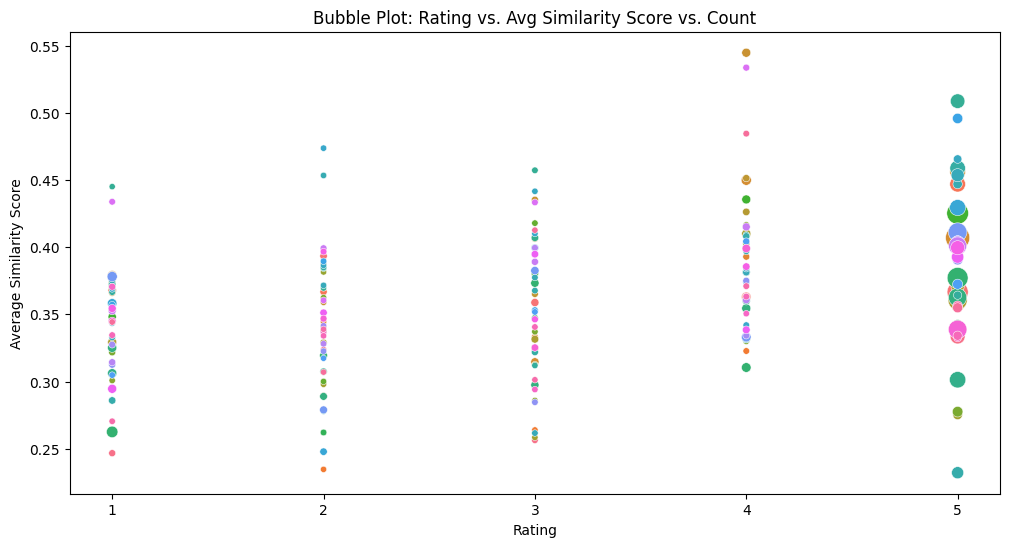

In [87]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=topic_infos2_rating_avgd, x='star_rating', y='bertopic_kmeans_similarity_score', 
                size='count', sizes=(20, 300), hue='subcategory')
plt.title('Bubble Plot: Rating vs. Avg Similarity Score vs. Count')
plt.xlabel('Rating')
plt.xticks(np.arange(1, 6, 1))
plt.ylabel('Average Similarity Score')
# hide legend
plt.legend().remove()
plt.show()

# compare results using top 15 vs top 10

In [62]:
topic_comp = pd.merge(topic_infos_rating_avgd, topic_infos2_rating_avgd, on=['subcategory', 'star_rating'], suffixes=('_15', '_10'))
topic_comp['diff_avg_similarity'] = topic_infos_rating_avgd['bertopic_kmeans_similarity_score'] - topic_infos2_rating_avgd['bertopic_kmeans_similarity_score']  # with 15 words - with 10 words
topic_comp

,subcategory,star_rating,bertopic_kmeans_similarity_score_15,count_15,bertopic_kmeans_similarity_score_10,count_10,diff_avg_similarity
0,ABRASIVE CLEANERS,1.0,0.244523,244,0.246734,244,-0.002211
1,ABRASIVE CLEANERS,2.0,0.288028,78,0.323720,78,-0.035691
2,ABRASIVE CLEANERS,3.0,0.303126,123,0.256354,123,0.046773
3,ABRASIVE CLEANERS,4.0,0.311645,298,0.333549,298,-0.021905
4,ABRASIVE CLEANERS,5.0,0.328670,3684,0.333508,3684,-0.004838
...,...,...,...,...,...,...,...
215,WOOD/FURNITURE/DUST WOOD/FURNITURE CLEANER,1.0,0.248994,77,0.344296,77,-0.095303
216,WOOD/FURNITURE/DUST WOOD/FURNITURE CLEANER,2.0,0.313815,30,0.307019,30,0.006796
217,WOOD/FURNITURE/DUST WOOD/FURNITURE CLEANER,3.0,0.377992,62,0.412615,62,-0.034624
218,WOOD/FURNITURE/DUST WOOD/FURNITURE CLEANER,4.0,0.419244,137,0.484432,137,-0.065188


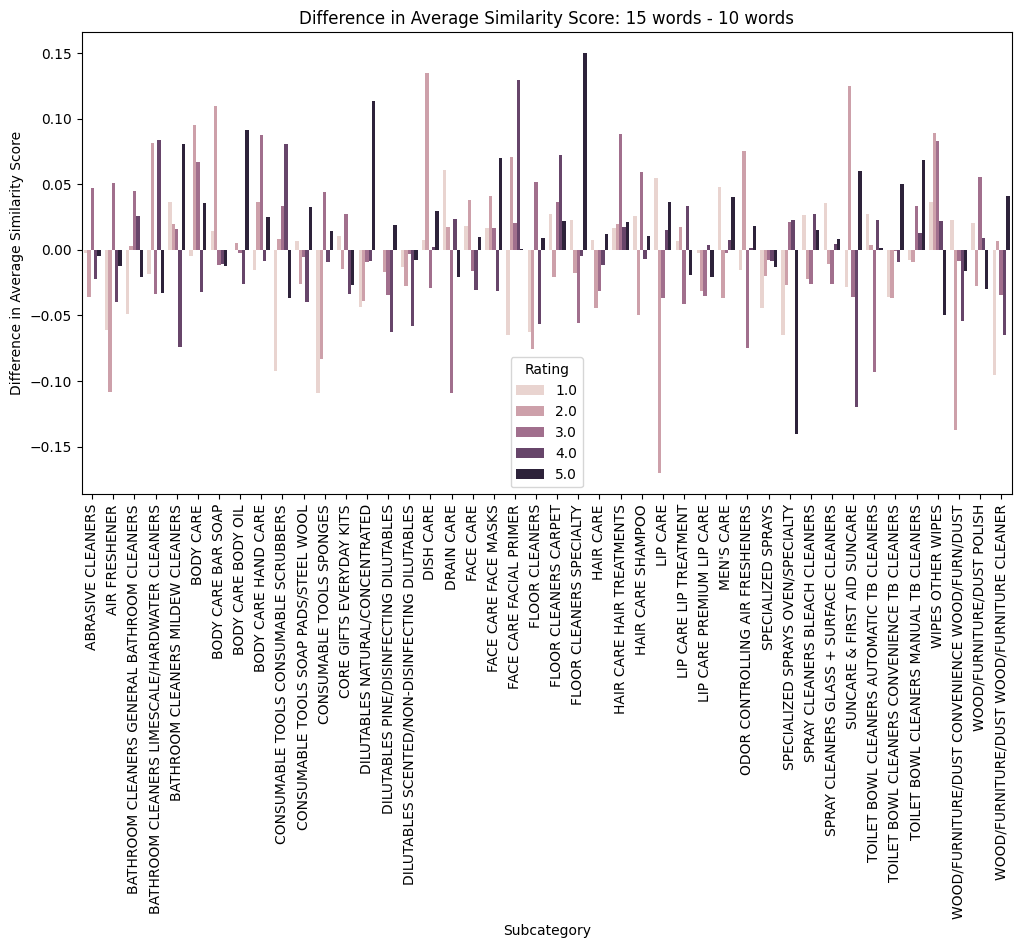

In [83]:
# plot the difference in average similarity score
plt.figure(figsize=(12, 6))
sns.barplot(data=topic_comp, x='subcategory', y='diff_avg_similarity', hue='star_rating')
plt.title('Difference in Average Similarity Score: 15 words - 10 words')
plt.xlabel('Subcategory')
plt.xticks(rotation=90)
plt.ylabel('Difference in Average Similarity Score')
plt.legend(title='Rating')
plt.show()

with 15 words, avg similarity much higher for 5 star ratings, but much lower for 3 star ratings
- with 15 words, one topic for 3 star rating was very general  
    - "Effective product working well for most users"  0.21
    - "Likable cleaning product with strong scent, g...	  0.438
- with 10 words, both topics contained some specific detail 
    - "Effective cleaning with pleasant smell and ea..."   0.49
    - "Satisfactory clorox product with occasional l..."   0.34

=> could prompt llm to be more specific in some cases, and could be more coherent
- "Great product love in bathroom use"	is too choppy

In [64]:
# select topic info for 3 star rating subcategory spray cleaners bleach cleaners
subcat = 'SPRAY CLEANERS BLEACH CLEANERS'
pd.set_option('display.max_colwidth', None)
topic_infos_df[(topic_infos_df['subcategory']==subcat) & (topic_infos_df['star_rating']==3)]

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
4,3.0,"""Effective cleaning and strong scent in bathrooms""",0.448911,58,SPRAY CLEANERS BLEACH CLEANERS
5,3.0,"""Sprayer or product's ability to work with box and order""",0.297517,107,SPRAY CLEANERS BLEACH CLEANERS


In [65]:
topic_infos2_df[(topic_infos2_df['subcategory']==subcat) & (topic_infos2_df['star_rating']==3)]

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
4,3.0,"""Bottle sprayer works, but some leak in the box.""",0.399012,106,SPRAY CLEANERS BLEACH CLEANERS
5,3.0,"""Clean scent remains with long use, good product""",0.399892,59,SPRAY CLEANERS BLEACH CLEANERS


In [66]:
topic_infos_df[(topic_infos_df['subcategory']==subcat) & (topic_infos_df['star_rating']==5)]

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
8,5.0,"""Clean and great to use products with pleasant smell and good performance in both bathroom and kitchen""",0.417857,3777,SPRAY CLEANERS BLEACH CLEANERS


In [67]:
topic_infos2_df[(topic_infos2_df['subcategory']==subcat) & (topic_infos2_df['star_rating']==5)]

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
8,5.0,"""Clean products work great in bathrooms and kitchens""",0.402713,3777,SPRAY CLEANERS BLEACH CLEANERS


In [ ]:
# save the big dataframe
res2_df[subcats_filter].to_csv('../../data/bertopic_kmeans_44subcats_top10words.csv', index=False)

In [ ]:
res_df[subcats_filter].to_csv('../../data/bertopic_kmeans_44subcats_top15words.csv', index=False)

In [71]:
res2_df.columns

Index(['subcategory', 'review_text', 'star_rating',
       'bertopic_kmeans_topic_number', 'bertopic_kmeans_topic_words',
       'bertopic_kmeans_topic_label', 'bertopic_kmeans_similarity_score'],
      dtype='object')

In [79]:
res_df = pd.read_csv('../../data/bertopic_kmeans_44subcats_top15words.csv')
res_df.drop_duplicates(subset=['subcategory', 'star_rating', 'review_text'], keep='last', inplace=True)
res_df.shape

(193832, 7)

In [76]:
# find total num of reviews across of all subcategories
df[df['subcategory'].isin(subcats)].value_counts().sum()

np.int64(193832)

In [82]:
res_df.head()

,subcategory,review_text,star_rating,bertopic_kmeans_topic_number,bertopic_kmeans_topic_words,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score
8334776,FLOOR CLEANERS,the mop be cheap the wringing attachment doesnt wring well and leave a lot of water on the mop and worse the mop head break off after the first use i be leave to finish the job on my hand and kneesdont buy,1.0,0.0,"mop, use, floor, product, clean, buy, bad, water, like, just, cleaner, leave, try, time, make","""Mop fails to clean effectively""",0.554019
8334777,BATHROOM CLEANERS MILDEW CLEANERS,this product be recommend for a front load wash machine the seal have mold build up follow exact direction and zero result on the mold home depot offer full refund,1.0,1.0,"mold, mildew, product, bleach, use, remove, stain, work, clean, money, good, smell, didnt, just, waste","""Product causes mold and mildew, requires bleach for removal""",0.349462
8334778,ODOR CONTROLLING AIR FRESHENERS,i keep multiple bottle in the bathroom and carry the travel size in my purse i hope they never stop make this,5.0,0.0,"smell, scent, love, product, spray, like, great, use, odor, good, air, work, fresh, room, really","""Fresh great scent and odor in air""",0.241971
8334779,FLOOR CLEANERS,i recently just get this mop love how easy it be to use,5.0,0.0,"use, clean, floor, great, product, work, carpet, mop, stain, good, love, smell, cleaner, easy, best","""Effective cleaning on floors, carpets, and carpets, easy to use and great results.""",0.300557
8334780,TOILET BOWL CLEANERS CONVENIENCE TB CLEANERS,convenient and easy to utilize,4.0,1.0,"like, product, use, work, good, easy, great, buy, wish, price, order, item, love, just, dont","""Excellent product for easy use and great value""",0.465096


In [89]:
subcats_filter = res_df['subcategory'].isin(subcats)